Seleção de uma série temporal (real ou simulada)

In [4]:
# ler dados
import pandas as pd

df = pd.read_csv('../tesla_data.csv')

In [7]:
df.head()

,Year,Month,Region,Model,Estimated_Deliveries,Production_Units,Avg_Price_USD,Battery_Capacity_kWh,Range_km,CO2_Saved_tons,Source_Type,Charging_Stations
0,2023,5,Europe,Model S,17646,17922,92874.27,120,704,1863.42,Interpolated (Month),12207
1,2015,2,Asia,Model X,3797,4164,62205.65,75,438,249.46,Official (Quarter),7640
2,2019,1,North America,Model X,8411,9189,117887.32,82,480,605.59,Interpolated (Month),14071
3,2021,2,North America,Model 3,6555,7311,89294.91,120,712,700.07,Official (Quarter),9333
4,2016,12,Middle East,Model Y,12374,13537,114846.78,120,661,1226.88,Estimated (Region),8722


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2640 entries, 0 to 2639
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  2640 non-null   int64  
 1   Month                 2640 non-null   int64  
 2   Region                2640 non-null   object 
 3   Model                 2640 non-null   object 
 4   Estimated_Deliveries  2640 non-null   int64  
 5   Production_Units      2640 non-null   int64  
 6   Avg_Price_USD         2640 non-null   float64
 7   Battery_Capacity_kWh  2640 non-null   int64  
 8   Range_km              2640 non-null   int64  
 9   CO2_Saved_tons        2640 non-null   float64
 10  Source_Type           2640 non-null   object 
 11  Charging_Stations     2640 non-null   int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 247.6+ KB


In [15]:
# criando coluna data
df['Date'] = pd.to_datetime(df['Year'].astype(str) + '-' + df['Month'].astype(str) + '-01')

In [16]:
df

,Year,Month,Region,Model,Estimated_Deliveries,Production_Units,Avg_Price_USD,Battery_Capacity_kWh,Range_km,CO2_Saved_tons,Source_Type,Charging_Stations,Date
0,2023,5,Europe,Model S,17646,17922,92874.27,120,704,1863.42,Interpolated (Month),12207,2023-05-01
1,2015,2,Asia,Model X,3797,4164,62205.65,75,438,249.46,Official (Quarter),7640,2015-02-01
2,2019,1,North America,Model X,8411,9189,117887.32,82,480,605.59,Interpolated (Month),14071,2019-01-01
3,2021,2,North America,Model 3,6555,7311,89294.91,120,712,700.07,Official (Quarter),9333,2021-02-01
4,2016,12,Middle East,Model Y,12374,13537,114846.78,120,661,1226.88,Estimated (Region),8722,2016-12-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2635,2021,10,Middle East,Model Y,13488,14333,113771.10,120,719,1454.68,Official (Quarter),4273,2021-10-01
2636,2019,7,Middle East,Model S,18300,18407,81889.67,82,487,1336.81,Official (Quarter),9833,2019-07-01
2637,2019,9,Asia,Model S,13291,14839,97139.38,100,580,1156.32,Estimated (Region),13709,2019-09-01
2638,2020,5,Asia,Cybertruck,3471,3714,69990.57,60,358,186.39,Interpolated (Month),6754,2020-05-01


In [17]:
# gerando dados sobre as vendas de um modelo específico, nesse caso o model s
model = "Model S"

df_model = df[df['Model'] == model]

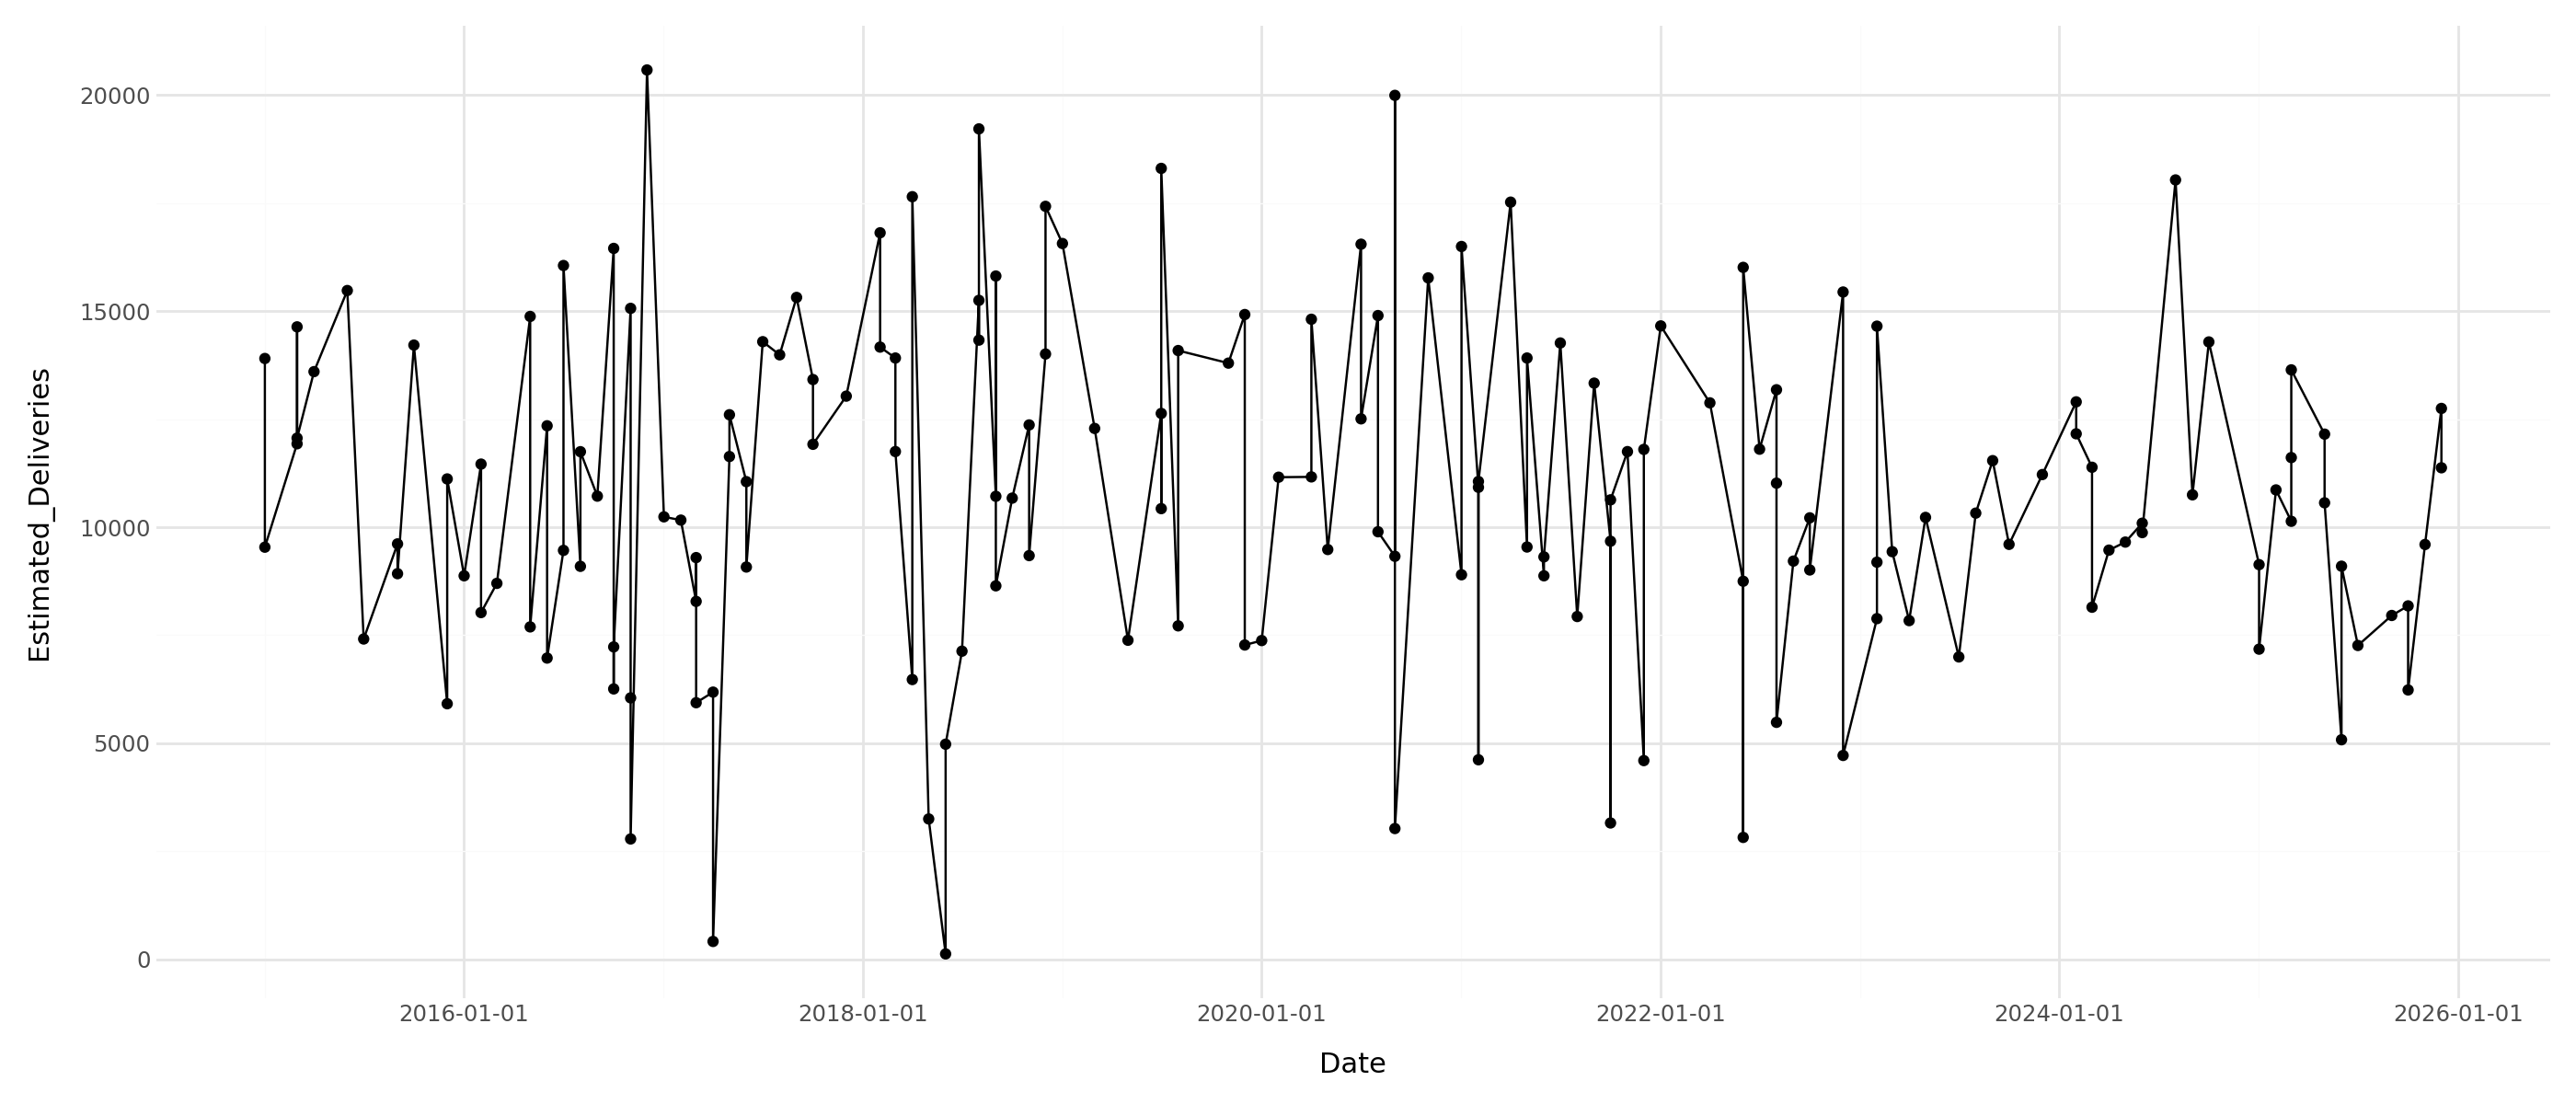

In [40]:
# plotando pela quantidade de vendas em estimated deliveries
from plotnine import ggplot, aes, geom_line, geom_point, theme, theme_minimal

df_model_official = df_model[df_model['Source_Type'] == 'Official (Quarter)']

(
    ggplot(df_model_official, aes(x='Date', y='Estimated_Deliveries'))
    + theme_minimal()
    + geom_line()
    + geom_point()
    + theme(figure_size=(14,6))
)

C:\Users\Usuario\AppData\Local\Temp\ipykernel_1040\3258653698.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


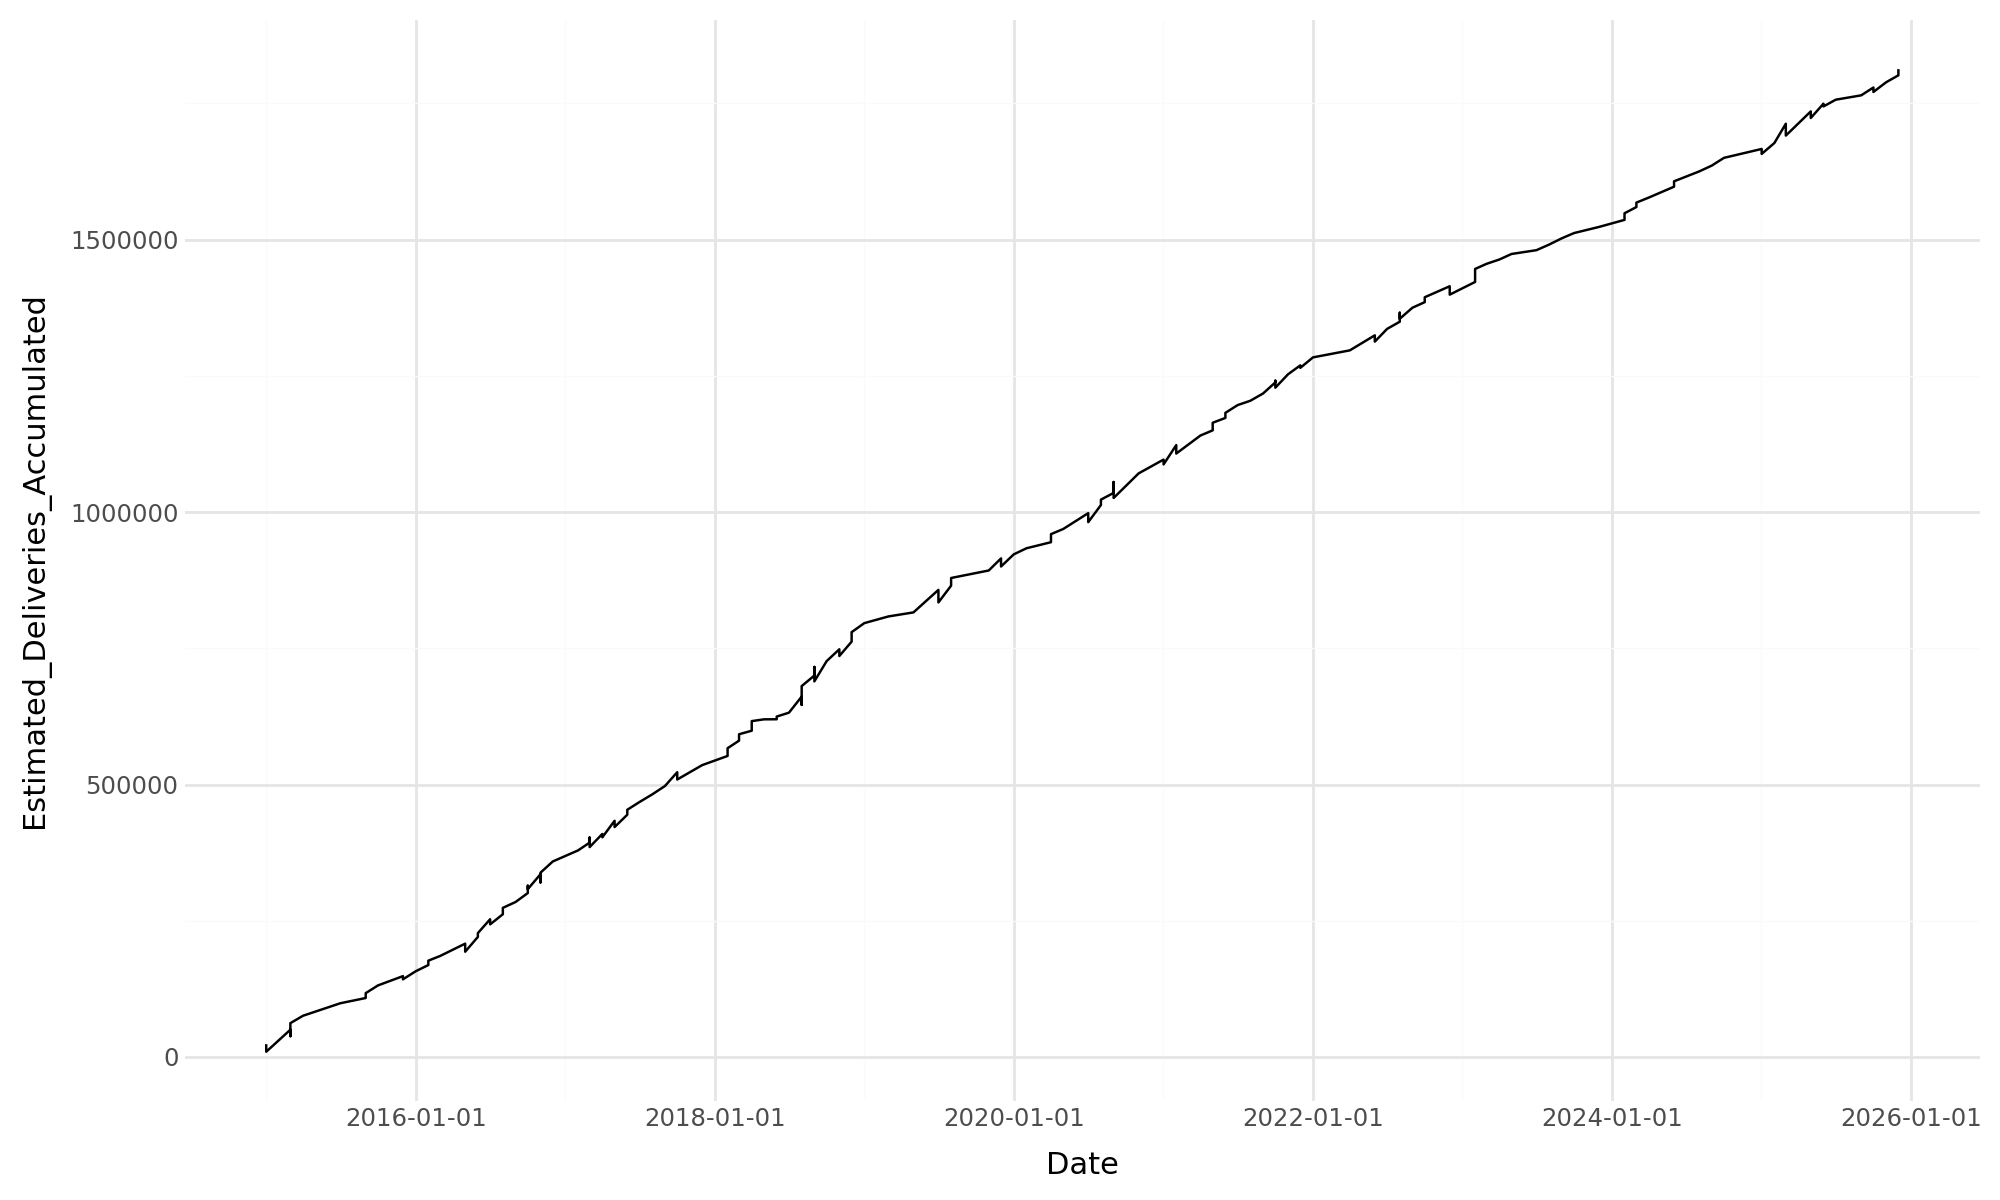

In [52]:
# vendo valor acumulado de entregas ao longo do tempo
df_model_official['Estimated_Deliveries_Accumulated'] = df_model_official.sort_values('Date')['Estimated_Deliveries'].cumsum()

# plotando
(
    ggplot(df_model_official, aes(x='Date', y='Estimated_Deliveries_Accumulated'))
    + theme_minimal()
    + geom_line()
    + theme(figure_size=(10,6))
)

Eliminação proposital de períodos e estimação dos dados faltantes usando diferentes técnicas de imputação (Interpolação Linear, Média Móvel, Regressão, KNN, etc.)

Comparação entre valores reais e estimados.